In [1]:
import torch
torch.manual_seed(123)

In [2]:
# Fastai is required by eb_ml_battery_lib
!pip install fastai==2.5.3 -q
# import
import pandas as pd
import numpy as np
import sys
from fastai.tabular import *
# Load EB_ML python libraries
# The following libraries are used in this notebook and should be installed in your local machine before running this notebook.
# eb_colab_utils.py
# eb_ml_battery_lib.py
# eb_ml_utils.py

# path to load external *.py files used in this notebook
# Note: in Google Colab virtual machine you shoud copy the files in "/content" folder after BEFORE running this notebook's cell
external_python_file_path='../src'
sys.path.append(external_python_file_path)


from eb_ml_colab_utils import get_root_path,copy_model_to_google_drive
from eb_ml_battery_lib import load_soc_dataset
from eb_ml_utils import show_pair_plot,show_coorelation_plot

You should consider upgrading via the '/Users/emanuelebuchicchio/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
#configuration dictionary
config ={}

# Root working folder (local or Google Drive)
# config['ROOT_DIR'] = get_root_path("batterie")
config['ROOT_DIR'] = get_root_path("..")  

# Folder with dataset in CSV format
#config['DATASETS_DIR'] = config['ROOT_DIR']+"/datasets"
config['DATASETS_DIR'] = config['ROOT_DIR']+"/datasets/EIS-vs-SOC-May2022"

# List of SoC level into dataset
#config['soc_list']=['100','090','080','070','060','050','040','030','020','010']
config['soc_list']=['100','090','080','070','060','050','040','030','020','010']

# Data acquition file to load from dateset folder
battery_list=["03_1","03_2","03_3","03_4","03_5","03_6","03_7","03_8","03_9","02_1","02_2","02_3","02_4","02_5","02_6","02_7","02_8","02_9"]
dataset,feature_col_names=load_soc_dataset(battery_list,config["soc_list"],config['DATASETS_DIR'])

NOT running on COLAB


/Users/emanuelebuchicchio/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:7134: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(


In [4]:
dataset

,BATTERY_ID,EIS_ID,SOC,Z_f0,Z_f1,Z_f10,Z_f11,Z_f12,Z_f13,Z_f2,Z_f3,Z_f4,Z_f5,Z_f6,Z_f7,Z_f8,Z_f9
100,03,03_1,100,0.076569-0.004547j,0.075579-0.003016j,0.058207-0.006957j,0.055055-0.006083j,0.052511-0.004948j,0.050122-0.003366j,0.074930-0.002362j,0.074386-0.001810j,0.073517-0.001898j,0.073016-0.002361j,0.072143-0.003337j,0.069853-0.005223j,0.066702-0.006825j,0.062942-0.007240j
090,03,03_1,090,0.074560-0.005103j,0.072910-0.003908j,0.057430-0.006459j,0.054409-0.005560j,0.052058-0.004721j,0.049707-0.003247j,0.071837-0.002692j,0.071387-0.002087j,0.070374-0.001845j,0.069751-0.002105j,0.069115-0.002792j,0.067244-0.004290j,0.064886-0.005643j,0.061813-0.006449j
080,03,03_1,080,0.072229-0.005322j,0.070622-0.004005j,0.056638-0.005795j,0.053834-0.005172j,0.051565-0.004330j,0.049230-0.003058j,0.069447-0.002742j,0.068973-0.002055j,0.068039-0.001784j,0.067393-0.002012j,0.066942-0.002481j,0.065466-0.003866j,0.063236-0.004944j,0.060332-0.005948j
070,03,03_1,070,0.071432-0.005437j,0.069737-0.004372j,0.056161-0.005563j,0.053587-0.005117j,0.051301-0.004305j,0.049184-0.003026j,0.068468-0.002889j,0.068113-0.002005j,0.067053-0.001765j,0.066550-0.001988j,0.065998-0.002408j,0.064399-0.003510j,0.062462-0.004631j,0.059982-0.005417j
060,03,03_1,060,0.072060-0.004399j,0.070062-0.004205j,0.056253-0.005545j,0.053652-0.005056j,0.051468-0.004223j,0.049392-0.002916j,0.068534-0.002555j,0.068189-0.001881j,0.067142-0.001674j,0.066788-0.001932j,0.066186-0.002409j,0.064686-0.003625j,0.062710-0.004770j,0.060049-0.005462j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
050,02,02_9,050,0.100901-0.004058j,0.099489-0.003159j,0.086221-0.005534j,0.083520-0.005051j,0.081324-0.004534j,0.078732-0.003225j,0.098361-0.002241j,0.098046-0.001646j,0.097126-0.001766j,0.096732-0.002107j,0.096320-0.002634j,0.094033-0.003700j,0.092283-0.004557j,0.089730-0.005288j
040,02,02_9,040,0.101036-0.003861j,0.099920-0.002810j,0.086702-0.005583j,0.084174-0.005194j,0.081620-0.004625j,0.079288-0.003455j,0.099115-0.001984j,0.098922-0.001434j,0.098010-0.001497j,0.097516-0.001873j,0.097106-0.002699j,0.094894-0.004111j,0.092895-0.004871j,0.090186-0.005497j
030,02,02_9,030,0.102393-0.003688j,0.101233-0.002940j,0.087067-0.005633j,0.084500-0.005306j,0.082101-0.004529j,0.079644-0.003359j,0.100460-0.002009j,0.100250-0.001490j,0.099465-0.001722j,0.098749-0.002102j,0.097917-0.002800j,0.095842-0.004414j,0.093611-0.005320j,0.090621-0.005730j
020,02,02_9,020,0.105715-0.004282j,0.104272-0.003556j,0.087650-0.005772j,0.085030-0.005351j,0.082625-0.004540j,0.080108-0.003338j,0.103228-0.002460j,0.102998-0.001914j,0.101745-0.002301j,0.101106-0.002877j,0.099576-0.003658j,0.096865-0.005093j,0.094100-0.005542j,0.091128-0.005788j


In [5]:
dataset.reset_index(drop=True,inplace=True)
dataset['SOC_float'] = dataset.SOC.astype('float')
dataset['SOC_category'] = dataset.SOC.astype('category')

In [6]:
from cmath import phase, polar, rect
df=dataset[feature_col_names]
df_phi= df.apply(lambda col: col.apply(lambda val: phase(val)))
df_abs= df.apply(lambda col: col.apply(lambda val: abs(val)))

In [7]:
df_commn=dataset[['SOC_float','BATTERY_ID','EIS_ID']]
dataset_polar= df_phi.join(df_abs,lsuffix='_abs' , rsuffix="_phi")
dataset_polar= df_commn.join(dataset_polar)
print(dataset_polar)

     SOC_float BATTERY_ID EIS_ID  Z_f0_abs  Z_f1_abs  Z_f2_abs  Z_f3_abs  \
0        100.0         03   03_1 -0.059308 -0.039878 -0.031516 -0.024327   
1         90.0         03   03_1 -0.068332 -0.053545 -0.037459 -0.029226   
2         80.0         03   03_1 -0.073549 -0.056644 -0.039456 -0.029790   
3         70.0         03   03_1 -0.075971 -0.062613 -0.042172 -0.029422   
4         60.0         03   03_1 -0.060966 -0.059942 -0.037260 -0.027579   
..         ...        ...    ...       ...       ...       ...       ...   
175       50.0         02   02_9 -0.040194 -0.031746 -0.022784 -0.016786   
176       40.0         02   02_9 -0.038191 -0.028114 -0.020018 -0.014491   
177       30.0         02   02_9 -0.036002 -0.029031 -0.019993 -0.014860   
178       20.0         02   02_9 -0.040485 -0.034092 -0.023822 -0.018584   
179       10.0         02   02_9 -0.054070 -0.046475 -0.037516 -0.034582   

     Z_f4_abs  Z_f5_abs  Z_f6_abs  ...  Z_f4_phi  Z_f5_phi  Z_f6_phi  \
0   -0.025815 -

## Regression - Tabular Learner - Polar 

In [8]:
from fastai.tabular.all import *

In [9]:
polar_feature_names= list()
for feat_name in feature_col_names:
    polar_feature_names.append(feat_name+"_phi")
    polar_feature_names.append(feat_name+"_abs")

In [10]:
splits = RandomSplitter(valid_pct=0.2)(range_of(dataset_polar))

In [11]:
#Path / default location for saving/loading models
path = '../models'

#The dependent variable/target
dep_var = 'SOC_float'

#The list of categorical features in the dataset
cat_names = ['BATTERY_ID', 'EIS_ID'] 

#The list of continuous features in the dataset
#Exclude the Dependent variable 'Price'
cont_names =polar_feature_names

#List of Processes/transforms to be applied to the dataset
procs = [FillMissing, Categorify, Normalize]


In [12]:
dataset_polar['SOC_float']

0      100.0
1       90.0
2       80.0
3       70.0
4       60.0
       ...  
175     50.0
176     40.0
177     30.0
178     20.0
179     10.0
Name: SOC_float, Length: 180, dtype: float64

# Regression with Tabular Learner - Polar 

In [13]:
to = TabularPandas(dataset_polar, procs=[Categorify, FillMissing,Normalize],
                   cat_names = cat_names,
                   cont_names = polar_feature_names,
                   y_names='SOC_float',
                   splits=splits)

In [14]:
dls = to.dataloaders(bs=64)
dls.show_batch()

,BATTERY_ID,EIS_ID,Z_f0_phi,Z_f0_abs,Z_f1_phi,Z_f1_abs,Z_f2_phi,Z_f2_abs,Z_f3_phi,Z_f3_abs,Z_f4_phi,Z_f4_abs,Z_f5_phi,Z_f5_abs,Z_f6_phi,Z_f6_abs,Z_f7_phi,Z_f7_abs,Z_f8_phi,Z_f8_abs,Z_f9_phi,Z_f9_abs,Z_f10_phi,Z_f10_abs,Z_f11_phi,Z_f11_abs,Z_f12_phi,Z_f12_abs,Z_f13_phi,Z_f13_abs,SOC_float
0,02,02_7,0.105017,-0.061586,0.102793,-0.050929,0.101085,-0.033886,0.100383,-0.027613,0.099024,-0.025478,0.098117,-0.027614,0.096878,-0.031971,0.095284,-0.045824,0.093030,-0.056248,0.090374,-0.063358,0.086597,-0.067614,0.083613,-0.065338,0.081237,-0.056604,0.078680,-0.043664,70.0
1,03,03_8,0.104323,-0.052498,0.101935,-0.048911,0.100190,-0.031925,0.099658,-0.022307,0.098509,-0.021161,0.097946,-0.022596,0.097070,-0.025556,0.095563,-0.035751,0.093828,-0.046422,0.091543,-0.053716,0.088256,-0.056573,0.086019,-0.055803,0.083794,-0.050932,0.081317,-0.039699,60.0
2,03,03_5,0.103396,-0.052553,0.100949,-0.050602,0.099129,-0.032999,0.098790,-0.023187,0.097457,-0.021281,0.096829,-0.021970,0.096242,-0.026450,0.094514,-0.039504,0.092681,-0.050929,0.090053,-0.060743,0.086500,-0.063684,0.083873,-0.062550,0.081565,-0.053513,0.078993,-0.043381,60.0
3,03,03_9,0.117821,-0.052939,0.115816,-0.045714,0.114005,-0.039300,0.112953,-0.038586,0.110113,-0.051520,0.107457,-0.064658,0.104057,-0.070668,0.099327,-0.067363,0.096326,-0.065841,0.093803,-0.064957,0.090439,-0.062525,0.087751,-0.060234,0.085401,-0.054308,0.082766,-0.042954,10.0
4,03,03_6,0.105723,-0.049224,0.104602,-0.032718,0.103817,-0.024025,0.103289,-0.018648,0.102496,-0.019863,0.101790,-0.024493,0.100987,-0.029766,0.098624,-0.048823,0.096088,-0.061614,0.093046,-0.066877,0.088928,-0.070584,0.085914,-0.068640,0.083318,-0.060970,0.080608,-0.047682,100.0
5,03,03_7,0.103908,-0.037023,0.102645,-0.029308,0.101851,-0.018499,0.101617,-0.015542,0.100869,-0.015381,0.100287,-0.019648,0.099427,-0.025748,0.097863,-0.041022,0.095606,-0.052141,0.093102,-0.058047,0.089508,-0.060500,0.087046,-0.058081,0.084784,-0.051795,0.082233,-0.041800,30.0
6,02,02_9,0.101110,-0.038191,0.099960,-0.028114,0.099135,-0.020018,0.098932,-0.014491,0.098021,-0.015275,0.097534,-0.019210,0.097143,-0.027784,0.094983,-0.043291,0.093022,-0.052387,0.090353,-0.060881,0.086881,-0.064308,0.084335,-0.061630,0.081751,-0.056598,0.079363,-0.043551,40.0
7,03,03_5,0.105652,-0.047798,0.104625,-0.033168,0.103782,-0.025323,0.102884,-0.019586,0.102192,-0.020267,0.101542,-0.024548,0.100737,-0.031785,0.098462,-0.050441,0.095760,-0.065163,0.092558,-0.073098,0.088239,-0.074368,0.085160,-0.070950,0.082424,-0.063134,0.079524,-0.047615,100.0
8,02,02_6,0.109731,-0.040396,0.108165,-0.033259,0.106887,-0.024521,0.106540,-0.019049,0.105333,-0.023232,0.104529,-0.030538,0.103701,-0.037216,0.100625,-0.055869,0.097526,-0.064756,0.094248,-0.070625,0.090283,-0.070979,0.087309,-0.066791,0.084784,-0.059000,0.082104,-0.044614,20.0
9,03,03_8,0.104231,-0.056989,0.102316,-0.048168,0.100716,-0.032694,0.100079,-0.024634,0.098961,-0.022237,0.098148,-0.024600,0.097313,-0.027092,0.095713,-0.038159,0.093761,-0.048026,0.091647,-0.054222,0.088139,-0.057765,0.085767,-0.056294,0.083486,-0.052225,0.081157,-0.039840,70.0


In [15]:
learn = tabular_learner(dls, layers=[300,200, 100, 50],metrics= rmse,path=path)

SuggestedLRs(valley=0.010964781977236271)

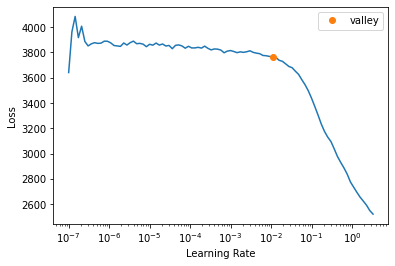

In [16]:
lr_value=learn.lr_find()
lr_value

In [17]:
learn.fit_one_cycle(250,lr_value)

epoch,train_loss,valid_loss,_rmse,time
0,3855.718018,3758.173584,61.303944,00:00
1,3892.298584,3760.100342,61.319656,00:00
2,3855.681152,3760.391846,61.322033,00:00
3,3838.870605,3758.963623,61.310387,00:00
4,3809.592773,3755.549805,61.282539,00:00
5,3779.939941,3749.655029,61.234428,00:00
6,3747.449707,3741.075439,61.164330,00:00
7,3737.418213,3730.098633,61.074532,00:00
8,3730.641113,3716.146240,60.960201,00:00
9,3720.928467,3699.317627,60.822018,00:00


In [18]:
learn.show_results()

,BATTERY_ID,EIS_ID,Z_f0_phi,Z_f0_abs,Z_f1_phi,Z_f1_abs,Z_f2_phi,Z_f2_abs,Z_f3_phi,Z_f3_abs,Z_f4_phi,Z_f4_abs,Z_f5_phi,Z_f5_abs,Z_f6_phi,Z_f6_abs,Z_f7_phi,Z_f7_abs,Z_f8_phi,Z_f8_abs,Z_f9_phi,Z_f9_abs,Z_f10_phi,Z_f10_abs,Z_f11_phi,Z_f11_abs,Z_f12_phi,Z_f12_abs,Z_f13_phi,Z_f13_abs,SOC_float,SOC_float_pred
0,2.0,10.0,-1.338328,-1.186232,-1.340017,-1.022992,-1.352156,-1.159603,-1.360917,-1.219155,-1.396319,-1.468714,-1.411878,-1.556157,-1.464792,-2.040155,-1.551043,-2.449809,-1.628853,-2.407037,-1.665638,-2.050993,-1.693719,-1.688448,-1.694079,-1.708204,-1.694581,-1.631382,-1.700097,-1.507561,10.0,11.850868
1,1.0,8.0,0.286175,-0.673905,0.257188,-0.865002,0.239595,-0.856308,0.224876,-0.845826,0.203687,-0.424894,0.204707,0.098287,0.208049,0.498508,0.235170,0.470811,0.263954,0.580317,0.279638,0.463811,0.286357,0.434329,0.295389,0.439863,0.289858,0.500050,0.289409,0.651844,80.0,71.357361
2,1.0,8.0,0.278763,-0.360229,0.247681,-0.253322,0.239474,-0.221222,0.233663,-0.393370,0.238253,0.041193,0.235945,0.215292,0.240987,0.275435,0.269932,0.549414,0.288648,0.380614,0.301740,0.453645,0.305446,0.335050,0.310478,0.228249,0.297813,0.246142,0.289925,0.456705,90.0,84.472214
3,2.0,12.0,0.693571,-0.763904,0.665822,-0.623160,0.646573,-0.522021,0.645546,-0.505834,0.643088,-0.142691,0.644600,0.046441,0.671849,-0.000304,0.688662,-0.165661,0.651215,-0.369346,0.608237,-0.349557,0.557334,-0.325201,0.523524,-0.099842,0.502216,0.043795,0.485375,0.036797,80.0,78.596436
4,2.0,18.0,0.329682,0.118886,0.374445,1.087821,0.420384,0.721913,0.415807,0.551126,0.439068,0.489959,0.452862,0.454672,0.473914,0.433938,0.490750,0.469750,0.493045,0.578563,0.513673,0.764963,0.536355,0.687688,0.560674,0.654830,0.559247,0.635788,0.551107,0.549503,100.0,97.901329
5,2.0,12.0,0.554173,0.616952,0.544811,0.005072,0.509549,0.165824,0.522377,0.296882,0.527392,0.336023,0.545580,0.480129,0.571918,0.117348,0.580849,0.228494,0.588612,0.128101,0.564775,-0.121187,0.535594,-0.003461,0.519556,0.120379,0.506614,0.344554,0.503739,0.366612,60.0,61.266136
6,2.0,16.0,0.551827,1.087751,0.567961,0.910947,0.589793,0.845141,0.593932,0.758391,0.610781,0.422446,0.618528,0.140152,0.633113,-0.101944,0.610529,0.163887,0.610652,0.690360,0.641148,1.017681,0.684508,0.989714,0.716580,1.012966,0.734113,1.057552,0.745688,0.967280,20.0,20.667114
7,1.0,3.0,0.324406,1.110908,0.348030,1.173530,0.374069,1.122553,0.393330,0.991658,0.415448,0.834652,0.437798,0.639019,0.466560,0.186618,0.481905,0.150970,0.484195,-0.075990,0.456428,0.006903,0.413984,-0.081360,0.392784,0.033771,0.385589,0.101918,0.376480,0.100568,50.0,44.210831
8,2.0,10.0,-1.445511,-0.822227,-1.416568,0.132789,-1.391811,-0.322410,-1.400760,-0.176145,-1.402600,-0.241064,-1.405513,-0.350270,-1.420494,-0.915017,-1.461468,-1.927043,-1.531786,-2.927636,-1.614830,-2.847602,-1.691623,-2.960475,-1.736971,-2.901221,-1.765571,-2.729197,-1.780921,-2.493734,100.0,96.959053


In [19]:
from sklearn.metrics import mean_squared_error
[y_pred,y_true] =learn.get_preds()
mean_squared_error(y_true,y_pred,squared=False)


3.5510066

In [20]:
learn.save('EIS_tabular_regression')

Path('../models/models/EIS_tabular_regression.pth')

# Tabular Learner Regression - Rectangular

In [21]:
from cmath import phase, polar, rect
df=dataset[feature_col_names]
df_real= df.apply(lambda col: col.apply(lambda val: np.real(val)))
df_imag= df.apply(lambda col: col.apply(lambda val: np.imag(val)))

In [22]:
rect_feature_names= list()
for feat_name in feature_col_names:
    rect_feature_names.append(feat_name+"_real")
    rect_feature_names.append(feat_name+"_imag")

In [23]:
df_commn=dataset[['SOC_float','BATTERY_ID','EIS_ID']]
dataset_rect= df_real.join(df_imag,lsuffix='_real' , rsuffix="_imag")
dataset_rect= df_commn.join(dataset_rect)
print(dataset_rect)

     SOC_float BATTERY_ID EIS_ID  Z_f0_real  Z_f1_real  Z_f2_real  Z_f3_real  \
0        100.0         03   03_1   0.076569   0.075579   0.074930   0.074386   
1         90.0         03   03_1   0.074560   0.072910   0.071837   0.071387   
2         80.0         03   03_1   0.072229   0.070622   0.069447   0.068973   
3         70.0         03   03_1   0.071432   0.069737   0.068468   0.068113   
4         60.0         03   03_1   0.072060   0.070062   0.068534   0.068189   
..         ...        ...    ...        ...        ...        ...        ...   
175       50.0         02   02_9   0.100901   0.099489   0.098361   0.098046   
176       40.0         02   02_9   0.101036   0.099920   0.099115   0.098922   
177       30.0         02   02_9   0.102393   0.101233   0.100460   0.100250   
178       20.0         02   02_9   0.105715   0.104272   0.103228   0.102998   
179       10.0         02   02_9   0.114456   0.112398   0.110775   0.109701   

     Z_f4_real  Z_f5_real  Z_f6_real  .

In [24]:
# Regression with Tabular Learner - Polar 
to = TabularPandas(dataset_rect, procs=[Categorify, FillMissing,Normalize],
                   cat_names = cat_names,
                   cont_names = rect_feature_names,
                   y_names='SOC_float',
                   splits=splits)
dls = to.dataloaders(bs=64)
dls.show_batch()
learn = tabular_learner(dls, layers=[300,200, 100, 50],metrics= rmse)



,BATTERY_ID,EIS_ID,Z_f0_real,Z_f0_imag,Z_f1_real,Z_f1_imag,Z_f2_real,Z_f2_imag,Z_f3_real,Z_f3_imag,Z_f4_real,Z_f4_imag,Z_f5_real,Z_f5_imag,Z_f6_real,Z_f6_imag,Z_f7_real,Z_f7_imag,Z_f8_real,Z_f8_imag,Z_f9_real,Z_f9_imag,Z_f10_real,Z_f10_imag,Z_f11_real,Z_f11_imag,Z_f12_real,Z_f12_imag,Z_f13_real,Z_f13_imag,SOC_float
0,03,03_6,0.116246,-0.006077,0.114165,-0.005030,0.112655,-0.004194,0.111638,-0.004047,0.109257,-0.005050,0.107024,-0.006004,0.103707,-0.006754,0.099344,-0.006639,0.096382,-0.006507,0.093648,-0.006243,0.089991,-0.005845,0.087440,-0.005443,0.084925,-0.004856,0.082317,-0.003626,10.0
1,03,03_4,0.102421,-0.003792,0.101338,-0.002764,0.100532,-0.001841,0.100258,-0.001438,0.099620,-0.001515,0.099043,-0.001903,0.098405,-0.002531,0.096791,-0.003915,0.094470,-0.005132,0.091804,-0.005898,0.087828,-0.005851,0.085082,-0.005499,0.082567,-0.004689,0.080092,-0.003591,40.0
2,02,02_1,0.067779,-0.003191,0.066625,-0.002395,0.066171,-0.001605,0.065928,-0.001331,0.065233,-0.001290,0.064951,-0.001707,0.064498,-0.002136,0.062910,-0.003857,0.060701,-0.004880,0.058092,-0.005526,0.054251,-0.005440,0.051934,-0.004782,0.049759,-0.004074,0.047447,-0.002810,30.0
3,02,02_5,0.106242,-0.006401,0.104198,-0.004812,0.102794,-0.003642,0.101965,-0.002702,0.100576,-0.002459,0.099644,-0.002883,0.098997,-0.003292,0.096808,-0.004662,0.094132,-0.005759,0.091109,-0.006365,0.086814,-0.006432,0.083787,-0.005977,0.081281,-0.005093,0.078667,-0.003669,80.0
4,03,03_6,0.103823,-0.005581,0.101358,-0.004989,0.099668,-0.003228,0.099296,-0.002226,0.098160,-0.002068,0.097518,-0.002170,0.096761,-0.002496,0.095139,-0.003571,0.093340,-0.004500,0.091018,-0.004955,0.087577,-0.005265,0.085036,-0.004833,0.082863,-0.004511,0.080353,-0.003287,60.0
5,02,02_6,0.106623,-0.003921,0.105467,-0.003235,0.104511,-0.002210,0.104235,-0.001619,0.103237,-0.001772,0.102682,-0.002458,0.102053,-0.003264,0.099559,-0.004896,0.096832,-0.005993,0.093760,-0.006548,0.089452,-0.006377,0.086636,-0.005861,0.084015,-0.005009,0.081368,-0.003598,30.0
6,03,03_4,0.113627,-0.005935,0.111926,-0.004826,0.110410,-0.003781,0.109337,-0.003451,0.107602,-0.004243,0.105682,-0.005199,0.103263,-0.005989,0.099052,-0.006484,0.095911,-0.006413,0.093041,-0.006324,0.089327,-0.006051,0.086482,-0.005501,0.084113,-0.004799,0.081456,-0.003624,10.0
7,02,02_4,0.106086,-0.005590,0.103528,-0.005275,0.101676,-0.003395,0.101073,-0.002493,0.099789,-0.002386,0.099039,-0.002693,0.098374,-0.003033,0.096141,-0.004277,0.093776,-0.005478,0.091029,-0.006077,0.086978,-0.006192,0.083877,-0.005687,0.081453,-0.004816,0.078762,-0.003454,60.0
8,02,02_2,0.066262,-0.004569,0.064116,-0.004154,0.062502,-0.002700,0.062342,-0.001792,0.061108,-0.001587,0.060769,-0.001721,0.060420,-0.002065,0.058980,-0.002957,0.057408,-0.003769,0.055408,-0.004586,0.052218,-0.004757,0.049988,-0.004531,0.047889,-0.003867,0.045968,-0.002599,60.0
9,02,02_4,0.107165,-0.006332,0.105013,-0.004916,0.103722,-0.003520,0.102852,-0.002799,0.101211,-0.002509,0.100603,-0.002884,0.099887,-0.003352,0.097424,-0.004753,0.094689,-0.005986,0.091708,-0.006719,0.087129,-0.006657,0.084112,-0.005922,0.081609,-0.005056,0.078829,-0.003442,80.0


In [25]:
dls = to.dataloaders(bs=64)
dls.show_batch()

,BATTERY_ID,EIS_ID,Z_f0_real,Z_f0_imag,Z_f1_real,Z_f1_imag,Z_f2_real,Z_f2_imag,Z_f3_real,Z_f3_imag,Z_f4_real,Z_f4_imag,Z_f5_real,Z_f5_imag,Z_f6_real,Z_f6_imag,Z_f7_real,Z_f7_imag,Z_f8_real,Z_f8_imag,Z_f9_real,Z_f9_imag,Z_f10_real,Z_f10_imag,Z_f11_real,Z_f11_imag,Z_f12_real,Z_f12_imag,Z_f13_real,Z_f13_imag,SOC_float
0,02,02_9,0.100901,-0.004058,0.099489,-0.003159,0.098361,-0.002241,0.098046,-0.001646,0.097126,-0.001766,0.096732,-0.002107,0.096320,-0.002634,0.094033,-0.003700,0.092283,-0.004557,0.089730,-0.005288,0.086221,-0.005534,0.083520,-0.005051,0.081324,-0.004534,0.078732,-0.003225,50.0
1,03,03_1,0.072229,-0.005322,0.070622,-0.004005,0.069447,-0.002742,0.068973,-0.002055,0.068039,-0.001784,0.067393,-0.002012,0.066942,-0.002481,0.065466,-0.003866,0.063236,-0.004944,0.060332,-0.005948,0.056638,-0.005795,0.053834,-0.005172,0.051565,-0.004330,0.049230,-0.003058,80.0
2,02,02_4,0.104545,-0.003870,0.103324,-0.002926,0.102673,-0.002098,0.102103,-0.001555,0.101310,-0.001838,0.100783,-0.002343,0.100185,-0.002937,0.097745,-0.004520,0.095411,-0.005965,0.092198,-0.006490,0.087758,-0.006504,0.084928,-0.005835,0.082257,-0.005009,0.079709,-0.003534,40.0
3,03,03_1,0.074560,-0.005103,0.072910,-0.003908,0.071837,-0.002692,0.071387,-0.002087,0.070374,-0.001845,0.069751,-0.002105,0.069115,-0.002792,0.067244,-0.004290,0.064886,-0.005643,0.061813,-0.006449,0.057430,-0.006459,0.054409,-0.005560,0.052058,-0.004721,0.049707,-0.003247,90.0
4,03,03_3,0.120219,-0.006775,0.117828,-0.005561,0.116147,-0.004650,0.114868,-0.004526,0.112238,-0.005381,0.109758,-0.006564,0.106507,-0.007302,0.101736,-0.007657,0.097987,-0.007608,0.094683,-0.007308,0.090304,-0.006761,0.087317,-0.005998,0.084578,-0.005188,0.081941,-0.003817,10.0
5,03,03_8,0.104179,-0.005474,0.101813,-0.004984,0.100139,-0.003198,0.099633,-0.002223,0.098487,-0.002084,0.097921,-0.002213,0.097039,-0.002480,0.095502,-0.003416,0.093727,-0.004354,0.091411,-0.004915,0.088114,-0.004990,0.085885,-0.004798,0.083686,-0.004266,0.081253,-0.003227,60.0
6,03,03_4,0.103640,-0.003795,0.102291,-0.003039,0.101516,-0.002100,0.101272,-0.001432,0.100556,-0.001571,0.099969,-0.002100,0.099237,-0.002837,0.097389,-0.004248,0.094912,-0.005464,0.092091,-0.005921,0.088075,-0.005892,0.085344,-0.005375,0.082939,-0.004719,0.080442,-0.003450,30.0
7,02,02_7,0.104939,-0.005669,0.102358,-0.005448,0.100507,-0.003232,0.099979,-0.002603,0.098624,-0.002411,0.097894,-0.002639,0.096800,-0.002872,0.095074,-0.003991,0.092789,-0.004949,0.090324,-0.005619,0.086346,-0.005676,0.083651,-0.005465,0.081338,-0.004525,0.078721,-0.003499,60.0
8,02,02_1,0.067677,-0.005082,0.066169,-0.003861,0.065113,-0.002713,0.064482,-0.001987,0.063490,-0.001727,0.063023,-0.001831,0.062371,-0.002154,0.061095,-0.003355,0.059224,-0.004278,0.056882,-0.005143,0.053280,-0.005332,0.050884,-0.004752,0.048604,-0.004016,0.046463,-0.002844,80.0
9,03,03_8,0.108884,-0.004223,0.107305,-0.003371,0.106272,-0.002476,0.105863,-0.001953,0.104804,-0.002315,0.103747,-0.003272,0.102329,-0.004095,0.099353,-0.005256,0.096596,-0.005679,0.094101,-0.005752,0.090482,-0.005487,0.088006,-0.005168,0.085726,-0.004568,0.083145,-0.003519,20.0


In [26]:
learn = tabular_learner(dls, layers=[300,200, 100, 50],metrics= rmse,path=path)

SuggestedLRs(valley=0.019054606556892395)

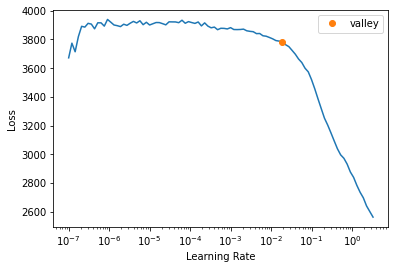

In [27]:
lr_value=learn.lr_find()
lr_value

In [28]:
learn.fit_one_cycle(250,0.045)



epoch,train_loss,valid_loss,_rmse,time
0,3733.250732,3771.069092,61.409031,00:00
1,3722.299561,3766.741211,61.373783,00:00
2,3794.118164,3763.794678,61.349773,00:00
3,3742.336914,3756.239990,61.288170,00:00
4,3718.641357,3742.996094,61.180031,00:00
5,3708.027344,3724.902832,61.031982,00:00
6,3706.942383,3695.108398,60.787403,00:00
7,3683.660889,3650.937012,60.422985,00:00
8,3656.131104,3593.507568,59.945873,00:00
9,3645.615234,3559.514160,59.661663,00:00


In [29]:
learn.show_results()

,BATTERY_ID,EIS_ID,Z_f0_real,Z_f0_imag,Z_f1_real,Z_f1_imag,Z_f2_real,Z_f2_imag,Z_f3_real,Z_f3_imag,Z_f4_real,Z_f4_imag,Z_f5_real,Z_f5_imag,Z_f6_real,Z_f6_imag,Z_f7_real,Z_f7_imag,Z_f8_real,Z_f8_imag,Z_f9_real,Z_f9_imag,Z_f10_real,Z_f10_imag,Z_f11_real,Z_f11_imag,Z_f12_real,Z_f12_imag,Z_f13_real,Z_f13_imag,SOC_float,SOC_float_pred
0,2.0,16.0,0.554919,0.709456,0.569854,0.569736,0.590856,0.459733,0.594816,0.402744,0.611775,0.150573,0.619557,-0.082809,0.633604,-0.336779,0.611228,-0.237546,0.613218,0.206776,0.645362,0.646761,0.687699,0.625453,0.719041,0.600514,0.735955,0.579601,0.746412,0.177756,20.0,20.865788
1,1.0,3.0,0.327696,0.866667,0.350563,0.976178,0.375438,0.833319,0.394358,0.682214,0.416769,0.556641,0.439557,0.399697,0.467777,-0.015846,0.482603,-0.176009,0.482839,-0.555526,0.454622,-0.587876,0.411130,-0.920848,0.390992,-0.840368,0.384510,-0.794160,0.375906,-0.821532,50.0,46.271996
2,2.0,11.0,-1.825053,1.745545,-1.793384,1.585275,-1.777087,1.566848,-1.763670,1.413581,-1.749943,1.140156,-1.742365,1.015596,-1.735515,1.069508,-1.726846,1.109409,-1.714054,1.148659,-1.692923,1.073907,-1.673517,1.101482,-1.666631,1.170208,-1.654846,1.394836,-1.643896,1.637254,40.0,43.534630
3,2.0,18.0,0.214895,1.266779,0.256220,1.236052,0.271822,1.142602,0.305000,1.143057,0.342149,0.869342,0.363340,0.693949,0.402203,0.629145,0.447379,0.792973,0.474573,0.629869,0.502060,0.788497,0.556696,0.928388,0.577064,0.760837,0.596629,0.755147,0.603235,0.275803,40.0,38.141037
4,2.0,18.0,0.238576,-0.550910,0.202602,-1.209816,0.166656,-0.641412,0.168029,-0.058724,0.180756,0.294292,0.184310,0.404424,0.210202,0.721773,0.266703,1.107536,0.329137,1.243299,0.379578,1.412573,0.452408,1.540491,0.479996,1.505400,0.514962,1.319773,0.538670,0.643055,60.0,60.330528
5,1.0,5.0,0.478168,-1.465492,0.443480,-1.341030,0.429013,-1.172598,0.395967,-0.682862,0.387268,-0.243072,0.404320,-0.280643,0.405342,0.316288,0.435712,0.108218,0.453811,0.146672,0.454150,-0.251331,0.451287,-0.508655,0.436350,-0.467395,0.434452,-0.288788,0.442157,0.004746,70.0,68.718620
6,2.0,10.0,-1.446173,0.385833,-1.415028,1.020783,-1.391761,0.563178,-1.400869,0.530092,-1.403123,0.393201,-1.406481,0.308567,-1.422887,-0.009476,-1.467663,-0.475022,-1.543850,-1.142965,-1.627147,-1.212041,-1.702703,-1.351778,-1.744889,-1.092583,-1.770150,-0.569362,-1.782594,0.196860,100.0,97.728065
7,1.0,4.0,0.656022,0.356717,0.667750,0.277595,0.674577,0.538055,0.684782,0.240500,0.699406,0.016672,0.710148,-0.140896,0.713277,-0.530800,0.691275,-0.972491,0.653502,-0.944528,0.626602,-0.846894,0.590722,-0.726046,0.593922,-0.728650,0.571980,-0.836266,0.567203,-0.551256,20.0,22.553450
8,1.0,8.0,0.283390,-0.986498,0.254569,-1.175446,0.238352,-1.001522,0.224086,-0.841771,0.203446,-0.402249,0.205401,0.024846,0.209873,0.343740,0.237199,0.257574,0.266521,0.330336,0.281561,0.198294,0.287617,0.125946,0.296277,0.081455,0.290682,0.155316,0.290096,0.348148,80.0,73.316940


In [30]:
from sklearn.metrics import mean_squared_error
[y_pred,y_true] =learn.get_preds()
mean_squared_error(y_true,y_pred,squared=False)

3.193073

In [31]:
learn.save('EIS_tabular_regression_rect')

Path('../models/models/EIS_tabular_regression_rect.pth')

In [33]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(3, 3)
    (1): Embedding(19, 8)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=39, out_features=300, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=300, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=200, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): LinBnDrop(
      (0): Linear(in_features=100, out_features=50, bias=False)
      (1): ReLU(inplace=

In [32]:
learn.summary()

TabularModel (Input shape: 64 x 2)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 3              
Embedding                                 9          True      
____________________________________________________________________________
                     64 x 8              
Embedding                                 152        True      
Dropout                                                        
BatchNorm1d                               56         True      
____________________________________________________________________________
                     64 x 300            
Linear                                    11700      True      
ReLU                                                           
BatchNorm1d                               600        True      
____________________________________________________________________________
                     64 x 200            
Linear                                    60000      T